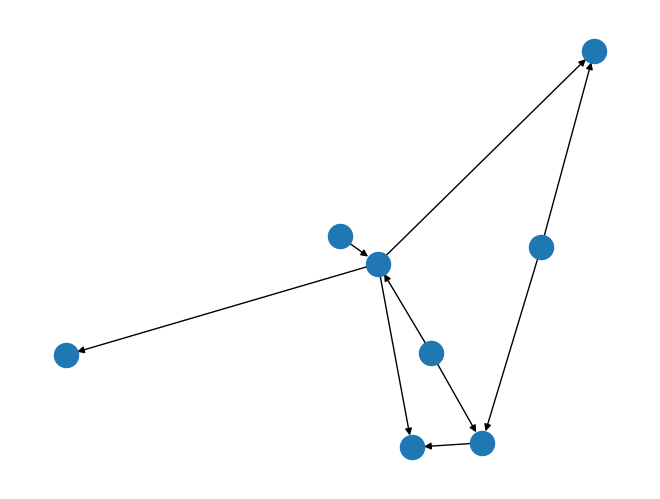

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])
nx.draw(G)
plt.show()

In [2]:
with open('input') as f:
    text = f.read()

In [3]:
example = """Valve AA has flow rate=0; tunnels lead to valves DD, II, BB
Valve BB has flow rate=13; tunnels lead to valves CC, AA
Valve CC has flow rate=2; tunnels lead to valves DD, BB
Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE
Valve EE has flow rate=3; tunnels lead to valves FF, DD
Valve FF has flow rate=0; tunnels lead to valves EE, GG
Valve GG has flow rate=0; tunnels lead to valves FF, HH
Valve HH has flow rate=22; tunnel leads to valve GG
Valve II has flow rate=0; tunnels lead to valves AA, JJ
Valve JJ has flow rate=21; tunnel leads to valve II"""
#text = example

In [4]:
exits = {}
edges = []
values = {}
for l in text.strip().split('\n'):
    name = l.split(' ')[1]
    rate = int(l.split('=')[1].split(';')[0])
    try:
        tunnels = l.split('valves ')[1].split(', ')
    except:
        tunnels = [l.split('valve ')[1]]
    #print(name, rate, tunnels)
    values[name] = rate
    exits[name] = tunnels
    for t in tunnels:
        edges.append((name, t))
values

{'TM': 3,
 'BX': 0,
 'GV': 8,
 'OI': 0,
 'OY': 0,
 'EZ': 0,
 'TN': 0,
 'SE': 0,
 'SG': 0,
 'EB': 0,
 'QB': 0,
 'GU': 0,
 'AW': 11,
 'IG': 0,
 'MJ': 0,
 'HX': 0,
 'IK': 0,
 'QZ': 0,
 'CV': 0,
 'ES': 0,
 'NK': 0,
 'SL': 0,
 'RG': 17,
 'ZB': 9,
 'SJ': 0,
 'GF': 19,
 'OU': 10,
 'TL': 0,
 'XG': 18,
 'EK': 20,
 'BV': 0,
 'AA': 0,
 'UO': 23,
 'LI': 0,
 'MI': 0,
 'MP': 0,
 'YQ': 14,
 'AF': 0,
 'SH': 0,
 'FD': 0,
 'KQ': 0,
 'DI': 0,
 'KT': 0,
 'MG': 0,
 'DQ': 0,
 'CE': 21,
 'MK': 0,
 'XL': 0,
 'OX': 0,
 'DT': 5,
 'IH': 0,
 'TP': 0,
 'FQ': 0,
 'CD': 6,
 'XR': 7,
 'VK': 0,
 'WC': 0,
 'TR': 0,
 'NQ': 0}

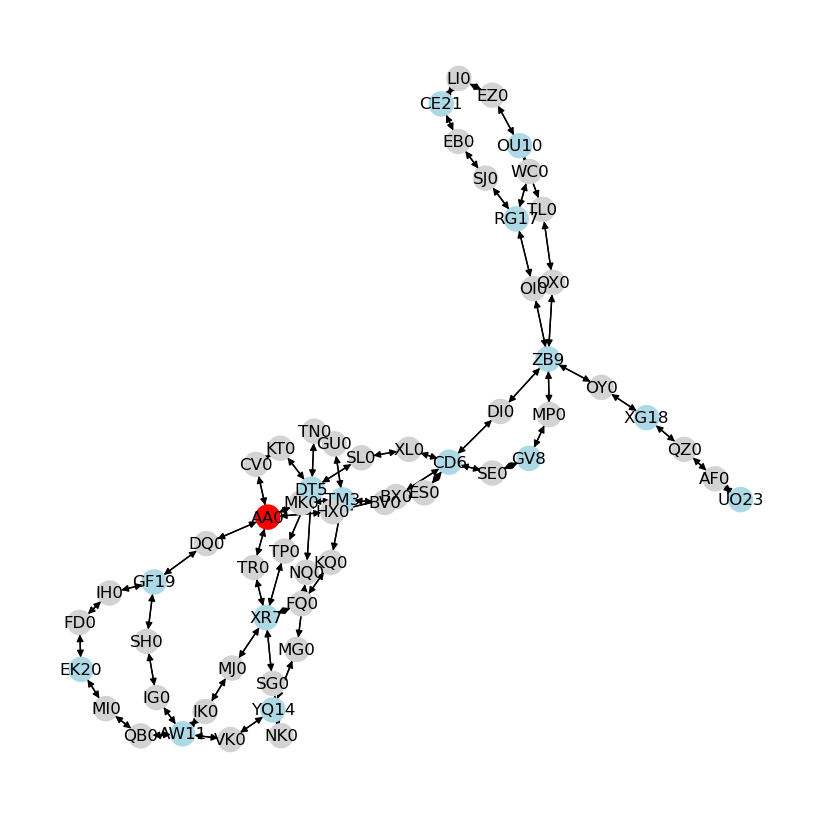

In [32]:
import math
G = nx.DiGraph()
for v in values:
    #print(v, values[v])
    G.add_node(v, color=('lightblue' if values[v] > 0 else 'red' if v=='AA' else 'lightgrey'))
G.add_edges_from(edges)
pos = nx.spring_layout(G,k=0.1)
colors = [node[1]['color'] for node in G.nodes(data=True)]
fig = plt.figure(figsize=(8, 8))
#G.nodes()
nx.draw(G, pos, node_color=colors, with_labels=True, labels={n: n+str(values[n]) for n in G.nodes()})
#nx.draw(G, with_labels=True)
plt.show()

In [ ]:
# "Universe at 29/UO ['AA', 'GF', 'EK', 'AW', 'YQ', 'XG'] f 1519 c 1519"

In [6]:
important = dict((k, v) for k,v in values.items() if v > 0)
imp_sorted = sorted(important.items(), key=lambda a: a[1], reverse=True)
imp_sorted

[('UO', 23),
 ('CE', 21),
 ('EK', 20),
 ('GF', 19),
 ('XG', 18),
 ('RG', 17),
 ('YQ', 14),
 ('AW', 11),
 ('OU', 10),
 ('ZB', 9),
 ('GV', 8),
 ('XR', 7),
 ('CD', 6),
 ('DT', 5),
 ('TM', 3)]

In [7]:
import functools
@functools.cache
def bfs(start, end):
    #visited = set()
    shortest_path = {start: []}
    visited = set()
    current = start
    to_visit = [start]
    while True:
        #if not to_visit:
        current = to_visit.pop(0)
        #print(current)
        if current in visited:
            continue
        visited.add(current)
        for nei in exits[current]:
            if nei == end:
                return shortest_path[current] + [end]
            if not nei in shortest_path:
                shortest_path[nei] = shortest_path[current] + [nei]
                to_visit.append(nei)
#bfs('AA', 'CE')

In [8]:
@functools.cache
def dist(start, end):
    return len(bfs(start, end))

In [9]:
[(dist('AA', x), x, v) for x, v in imp_sorted]

[(10, 'UO', 23),
 (10, 'CE', 21),
 (5, 'EK', 20),
 (2, 'GF', 19),
 (7, 'XG', 18),
 (7, 'RG', 17),
 (5, 'YQ', 14),
 (5, 'AW', 11),
 (8, 'OU', 10),
 (5, 'ZB', 9),
 (5, 'GV', 8),
 (2, 'XR', 7),
 (3, 'CD', 6),
 (3, 'DT', 5),
 (2, 'TM', 3)]

In [10]:
def wishful_sort(curr, rest, turns_left):
    if not rest:
        return rest
    best = max(rest, key=lambda a: values[a] * (turns_left-dist(curr, a)))
    rest = [a for a in rest if a!=best]
    return [best]+wishful_sort(best, rest, turns_left-dist(curr, best))
wishful_sort('AA', important, 30)

['GF',
 'EK',
 'YQ',
 'AW',
 'XG',
 'UO',
 'ZB',
 'TM',
 'DT',
 'CD',
 'GV',
 'XR',
 'OU',
 'RG',
 'CE']

In [11]:
def sim(order):
    turn = 0
    curr = 'AA'
    perturn = 0
    points = 0
    for t in order:
        print(f'moving from {curr} to {t} and turning it on')
        turns_done = dist(curr, t) + 1
        print(f'took {turns_done} to do it')
        points += perturn * turns_done
        #print(f'points now are {points}')
        turn += turns_done
        if turn >= 30:
            points -= perturn * (turn-30)
            break
        perturn += values[t]
        print(f'pressure released per minute now {perturn}')
        curr = t
    return points
sim([a for a,b in imp_sorted])

moving from AA to UO and turning it on
took 11 to do it
pressure released per minute now 23
moving from UO to CE and turning it on
took 11 to do it
pressure released per minute now 44
moving from CE to EK and turning it on
took 16 to do it


605

In [12]:
sim(wishful_sort('AA', important, 30))

moving from AA to GF and turning it on
took 3 to do it
pressure released per minute now 19
moving from GF to EK and turning it on
took 4 to do it
pressure released per minute now 39
moving from EK to YQ and turning it on
took 6 to do it
pressure released per minute now 53
moving from YQ to AW and turning it on
took 3 to do it
pressure released per minute now 64
moving from AW to XG and turning it on
took 13 to do it
pressure released per minute now 82
moving from XG to UO and turning it on
took 4 to do it


1383

In [40]:
def ceiling(curr, currpoints, perturn, pending, sturn):
    pending = sorted(pending, key=lambda a: values[a], reverse=True)
    for turn in range(30-sturn):
        #print(f'turn {turn+sturn} perturn {perturn}')
        currpoints += perturn
        done = []
        if pending:
            for p in pending:
                if dist(curr, p) <= turn:
                    perturn += values[p]
                    done.append(p)
        pending = [p for p in pending if not p in done]
                    
    return currpoints
    #turns = 30-sturn
    #return currpoints+turns*(sum([values[v] for v in pending])+perturn)

In [41]:
def floor(currpoints, perturn, sturn):
    turns = 30-sturn
    return currpoints+perturn*turns

In [42]:
ceiling('AA', 0, sum(values[k] for k in important), [], 0)

5730

In [43]:
ceiling('AA', 0, 0, important, 0)

4373

In [44]:
class Universe:
    done = []
    pending = []
    curr = None
    perturn = 0
    points = 0
    turn = 0
    
    def __init__(self, other=None):
        if other is not None:
            self.done = list(other.done)
            self.pending = list(other.pending)
            self.curr = other.curr
            self.perturn = other.perturn
            self.points = other.points
            self.turn = other.turn
    
    def __str__(self):
        return f'Universe at {self.turn}/{self.curr} {str(self.done)} f {self.floor()} c {self.ceiling()}'
    
    def floor(self):
        return floor(self.points, self.perturn, self.turn)
    
    def ceiling(self):
        return ceiling(self.curr, self.points, self.perturn, self.pending, self.turn)
    
    def children(self):
        for p in wishful_sort(self.curr, self.pending, 30-self.turn):
            u = Universe(self)
            u.pending.remove(p)
            u.done.append((self.curr, values[self.curr]))
            u.curr = p
            d = dist(self.curr, p)+1
            for t in range(self.turn, min(30, self.turn+d)):
                u.turn += 1
                u.points += self.perturn
            #print(u.turn)
            u.perturn += values[p]
            yield u

In [45]:
u = Universe()
u.curr = 'AA'
u.pending = [k for k in important]
[c.curr for c in u.children()]

['GF',
 'EK',
 'YQ',
 'AW',
 'XG',
 'UO',
 'ZB',
 'TM',
 'DT',
 'CD',
 'GV',
 'XR',
 'OU',
 'RG',
 'CE']

In [46]:
def simx(order):
    u = Universe()
    u.curr = 'AA'
    u.pending = [k for k in important]
    to_visit = [u]
    best_floor = None
    iters = 0
    #to_visit = [k for k in important]
    #for t in order:
    best = None
    while to_visit:
        u = to_visit.pop(0)
        uf = u.floor()
        if best_floor is None or uf > best_floor:
            best_floor = u.floor()
            best = u
        if u.ceiling() < best_floor:
            #print('skipped')
            continue
        print(u, best_floor)
        #print(u.ceiling() - best_floor)
        #if u.ceiling() == best_floor:
        #    return u
        iters += 1
        for c in u.children():
            if c.ceiling() > best_floor:
                to_visit.append(c)
    print(iters)
    return best
#simx(['DD', 'BB', 'JJ', 'HH', 'EE', 'CC'])
sol = simx(important)
sol

Universe at 0/AA [] f 0 c 4373 0
Universe at 3/GF [('AA', 0)] f 513 c 3665 513
Universe at 6/EK [('AA', 0)] f 480 c 2722 513
Universe at 6/YQ [('AA', 0)] f 336 c 2932 513
Universe at 6/AW [('AA', 0)] f 264 c 2767 513
Universe at 8/XG [('AA', 0)] f 396 c 2819 513
Universe at 11/UO [('AA', 0)] f 437 c 1816 513
Universe at 6/ZB [('AA', 0)] f 216 c 3410 513
Universe at 3/TM [('AA', 0)] f 81 c 3699 513
Universe at 4/DT [('AA', 0)] f 130 c 3537 513
Universe at 4/CD [('AA', 0)] f 156 c 3763 513
Universe at 6/GV [('AA', 0)] f 192 c 3229 513
Universe at 3/XR [('AA', 0)] f 189 c 3591 513
Universe at 9/OU [('AA', 0)] f 210 c 2481 513
Universe at 8/RG [('AA', 0)] f 374 c 2836 513
Universe at 11/CE [('AA', 0)] f 399 c 1840 513
Universe at 7/EK [('AA', 0), ('GF', 19)] f 973 c 2683 973
Universe at 9/YQ [('AA', 0), ('GF', 19)] f 807 c 2587 973
Universe at 7/AW [('AA', 0), ('GF', 19)] f 766 c 2728 973
Universe at 8/XR [('AA', 0), ('GF', 19)] f 667 c 2826 973
Universe at 13/XG [('AA', 0), ('GF', 19)] f 

Universe at 15/OU [('AA', 0), ('DT', 5), ('CD', 6), ('ZB', 9)] f 583 c 1585 1406
Universe at 14/GV [('AA', 0), ('DT', 5), ('CD', 6), ('ZB', 9)] f 561 c 1889 1406
Universe at 16/XG [('AA', 0), ('DT', 5), ('CD', 6), ('GV', 8)] f 666 c 1549 1406
Universe at 16/RG [('AA', 0), ('DT', 5), ('CD', 6), ('GV', 8)] f 652 c 1566 1406
Universe at 14/ZB [('AA', 0), ('DT', 5), ('CD', 6), ('GV', 8)] f 558 c 2064 1406
Universe at 18/CD [('AA', 0), ('DT', 5), ('ZB', 9), ('XG', 18)] f 688 c 1458 1406
Universe at 18/CD [('AA', 0), ('DT', 5), ('ZB', 9), ('RG', 17)] f 671 c 1448 1406
Universe at 16/OU [('AA', 0), ('DT', 5), ('ZB', 9), ('RG', 17)] f 739 c 1441 1406
Universe at 16/GV [('AA', 0), ('DT', 5), ('ZB', 9), ('CD', 6)] f 524 c 1526 1406
Universe at 16/CD [('AA', 0), ('DT', 5), ('ZB', 9), ('GV', 8)] f 530 c 1680 1406
Universe at 18/ZB [('AA', 0), ('DT', 5), ('GV', 8), ('XG', 18)] f 668 c 1414 1406
Universe at 18/ZB [('AA', 0), ('DT', 5), ('GV', 8), ('RG', 17)] f 653 c 1408 1406
Universe at 16/ZB [('AA

In [47]:
str(sol)

"Universe at 28/XG [('AA', 0), ('GF', 19), ('EK', 20), ('AW', 11), ('YQ', 14), ('DT', 5), ('CD', 6), ('ZB', 9)] f 1595 c 1595"

In [21]:
def simy(pending):
    pending = list(order)
    turn = 0
    curr = 'AA'
    perturn = 0
    points = 0
    #for t in order:
    while pending:
        #t = pending.pop(0)
        
        print(f'turn {turn}')
        print(f'moving from {curr} to {t} and turning it on')
        turns_done = dist(curr, t) + 1
        print(f'took {turns_done} to do it')
        points += perturn * turns_done
        #print(f'points now are {points}')
        turn += turns_done
        print(f'curr {curr}, points {points}, perturn {perturn}, pending {pending}, turn {turn}')
        if turn >= 30:
            points -= perturn * (turn-30)
            break
        perturn += values[t]
        print(f'pressure released per minute now {perturn}')
        print('ceiling', ceiling(curr, points, perturn, pending, turn))
        curr = t
    points += perturn * (30-turn)
    return points
simx(['DD', 'BB', 'JJ', 'HH', 'EE', 'CC'])

227


In [22]:
348 + 18*12

564

In [2]:
[a for a,b in [('AA', 0), ('GF', 19), ('EK', 20), ('AW', 11), ('YQ', 14), ('DT', 5), ('CD', 6), ('ZB', 9)]]

['AA', 'GF', 'EK', 'AW', 'YQ', 'DT', 'CD', 'ZB']